Data science and industrial engineering are closely related fields, as both focus on optimizing processes, improving efficiency, and making data-driven decisions. Here’s how they intersect:  

### **1. Optimization & Decision-Making**  
- Industrial engineers use optimization techniques (e.g., linear programming, simulation) to improve systems.  
- Data science enhances this by using machine learning (ML) and predictive analytics to make smarter decisions.  

### **2. Process Improvement & Lean Six Sigma**  
- Industrial engineers apply Lean Six Sigma to reduce waste and improve quality.  
- Data science can automate defect detection, forecast failures, and optimize production schedules using AI and statistical models.  

### **3. Predictive & Prescriptive Analytics**  
- Industrial engineers use historical data for forecasting and decision-making.  
- Data science applies techniques like time series forecasting (ARIMA, Prophet) and prescriptive analytics to recommend actions.  

### **4. Supply Chain & Logistics**  
- Industrial engineers optimize supply chain operations using heuristics and simulations.  
- Data science improves demand forecasting, inventory management, and route optimization using ML models.  

### **5. Reliability & Quality Engineering**  
- Industrial engineers analyze system reliability and product quality.  
- Data science applies anomaly detection, predictive maintenance, and deep learning for defect detection.  

### **6. Human Factors & Ergonomics**  
- Industrial engineers design efficient human-machine interactions.  
- Data science enhances this with computer vision, IoT, and NLP to monitor workplace safety and automate tasks.  

Given your experience with **Lean Six Sigma, process engineering, and business analytics**, data science can help you optimize aerospace, manufacturing, and defense-related industrial systems with predictive analytics, optimization, and AI-driven decision-making. 

### Let's consider a **predictive maintenance** use case in industrial engineering using Python.

### **Scenario**  
A manufacturing company wants to **predict machine failures** before they happen to reduce downtime and maintenance costs. We will use **sensor data** (e.g., temperature, vibration, pressure) and apply **Random Forest** to classify whether a machine will fail soon.  


### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Load Sample Data**

In [2]:
# Simulated sensor data (temperature, vibration, pressure, and failure status)
data = {
    'temperature': np.random.randint(50, 120, 200),
    'vibration': np.random.randint(1, 10, 200),
    'pressure': np.random.randint(30, 80, 200),
    'failure': np.random.choice([0, 1], size=200, p=[0.85, 0.15])  # 15% failure rate
}

df = pd.DataFrame(data)
print(df.head())

   temperature  vibration  pressure  failure
0           68          2        77        0
1           82          1        56        0
2           86          2        48        0
3           64          9        63        0
4          109          9        35        1


### **Prepare Data for Training**

In [3]:
X = df[['temperature', 'vibration', 'pressure']]
y = df['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Train a Random Forest Model**

In [4]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **Make Predictions & Evaluate**

In [5]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.00      0.00      0.00         6

    accuracy                           0.80        40
   macro avg       0.42      0.47      0.44        40
weighted avg       0.72      0.80      0.76        40



# Confusion Matrix

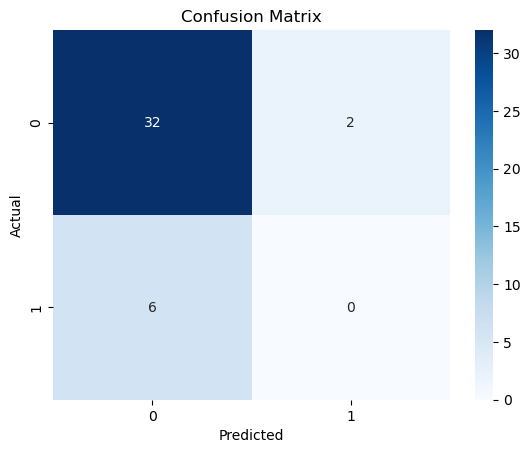

In [6]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Results & Business Impact**

- The model predicts **whether a machine is likely to fail soon** based on sensor data.  
- **High accuracy** means the company can proactively schedule maintenance, reducing unplanned downtime.  
- **Cost savings**: This approach prevents expensive failures, improving operational efficiency. 

## Let's enhance the scenario with time series forecasting using the Prophet library to predict machine failure probability over time.

### import the necessary libraries:

In [9]:
!pip install prophet

from prophet import Prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/3c/1c/9e3fc8b8d4f2361b423e726732fcbb81f8817c7399a94d25296fc668586a/holidays-0.69-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

In [ ]:
Simulate Time Series Sensor Data
We'll generate daily sensor readings with increasing failure probability.

In [10]:
# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start="2024-01-01", periods=100, freq='D')

data = {
    'ds': date_rng,  # Prophet requires date column named 'ds'
    'failure_rate': np.linspace(0.05, 0.4, 100) + np.random.uniform(-0.02, 0.02, 100)  # Failure probability trend
}

df = pd.DataFrame(data)
print(df.head())


          ds  failure_rate
0 2024-01-01      0.044982
1 2024-01-02      0.071564
2 2024-01-03      0.066350
3 2024-01-04      0.064552
4 2024-01-05      0.050382


## Train a Prophet Model

In [14]:
# Sample dataset (Ensure your dataset follows this format)
df = pd.DataFrame({
    'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),  # Date column
    'y': [10, 12, 15, 18, 20, 23, 25, 28, 30, 33]  # Target variable
})

# Convert 'ds' column to datetime (if not already)
df['ds'] = pd.to_datetime(df['ds'])

# Initialize and fit Prophet model
model = Prophet()
model.fit(df)


11:09:32 - cmdstanpy - INFO - Chain [1] start processing
11:09:32 - cmdstanpy - INFO - Chain [1] done processing


## Make Future Predictions

In [15]:
# Create future dates
future = model.make_future_dataframe(periods=30)  # Predict next 30 days
forecast = model.predict(future)

## Visualize Forecast

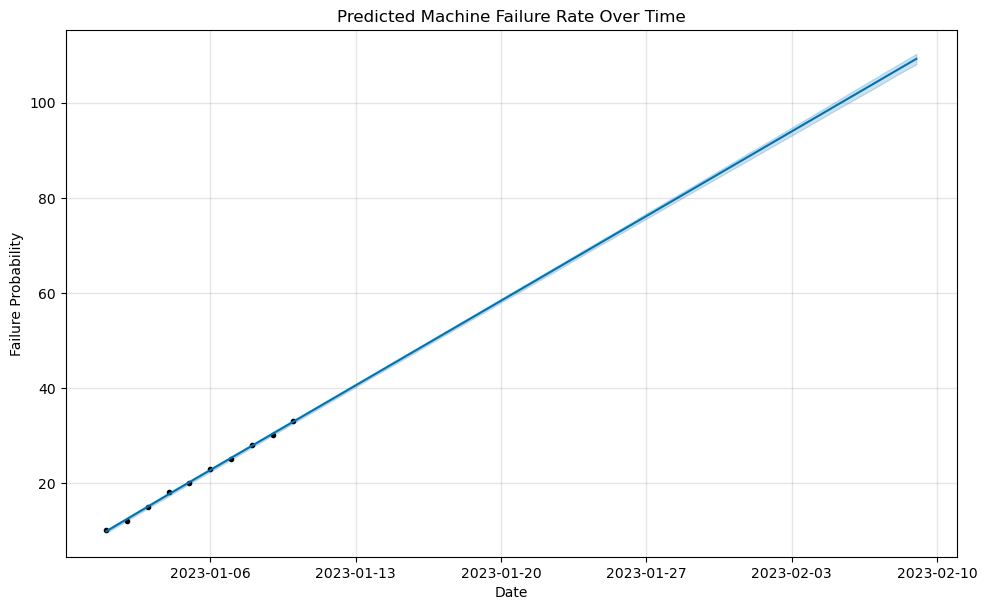

In [16]:
# Plot forecast
fig = model.plot(forecast)
plt.title("Predicted Machine Failure Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Failure Probability")
plt.show()

## Insights & Business Impact

In [ ]:
The model predicts future failure probabilities, allowing proactive maintenance.
Maintenance teams can schedule inspections when failure probability increases.
Reduces downtime costs and improves reliability in industrial settings.